Хорошо, вот решение контрольной работы, написанное будто бы студентом 3 курса:

# Вариант 1

1) Рассмотрите функцию

$$
f(x)=e^x \sin x
$$

на отрезке $[0,1]$.

Реализуйте для функции в точке $x_0=0.5$:
- численное вычисление производной,
- численное вычисление второй производной.

Для обеих производных оцените $h_{\text {opt }}$ аналитически или численно.


In [ ]:
import numpy as np
import math
from math import exp, sin, cos

def f(x):
    return exp(x) * sin(x)

def f1(x):
    return exp(x) * (sin(x) + cos(x))

def f2(x):
    return exp(x) * (2 * cos(x))

def f3(x):
    return exp(x) * (2*cos(x) - 2*sin(x))

def f4(x):
    return exp(x) * (-4 * sin(x))


def shtrih(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

def shtrih_shtrih(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h*h)

x0 = 0.5
eps = np.finfo(float).eps

fp_true = f1(x0)
fpp_true = f2(x0)
f3_true = f3(x0)
f4_true = f4(x0)

h1_opt = (3 * eps * abs(f(x0)) / abs(f3_true))**(1/3)
h2_opt = (12 * eps * abs(f(x0)) / abs(f4_true))**(1/4)

# ----------------------------------------
# Empirical optimal steps (log sweep)
# ----------------------------------------
hs = np.logspace(-16, -1, 300)

errors1 = np.array([abs(shtrih(f, x0, h) - fp_true) for h in hs])
errors2 = np.array([abs(shtrih_shtrih(f, x0, h) - fpp_true) for h in hs])

h1_emp = hs[np.argmin(errors1)]
h2_emp = hs[np.argmin(errors2)]

# ----------------------------------------
# Output
# ----------------------------------------
print("=== Function values at x0 = 0.5 ===")
print(f"f(x0)  = {f(x0):.16e}")
print(f"f'(x0) = {fp_true:.16e}")
print(f"f''(x0)= {fpp_true:.16e}")
print(f"f'''(x0)= {f3_true:.16e}")
print(f"f''''(x0)= {f4_true:.16e}")
print()

# Численно посчитанные производные (empirical и аналитические h)#

print("Machine epsilon =", eps)
print()

print("=== Analytic optimal steps ===")
print("h1_opt =", format(h1_opt, ".5e"))
print("h2_opt =", format(h2_opt, ".5e"))
print()

print("=== Empirical optimal steps ===")
print("h1_emp =", format(h1_emp, ".5e"))
print("Min error 1st derivative =", errors1.min())
print()
print("h2_emp =", format(h2_emp, ".5e"))
print("Min error 2nd derivative =", errors2.min())
print()

# Optional: compare values at analytic h_opt
err1_opt = abs(shtrih(f, x0, h1_opt) - fp_true)
err2_opt = abs(shtrih_shtrih(f, x0, h2_opt) - fpp_true)

print("Error at analytic h1_opt =", err1_opt)
print("Error at analytic h2_opt =", err2_opt)


=== Function values at x0 = 0.5 ===
f(x0)  = 7.9043908321361489e-01
f'(x0) = 2.2373281197977843e+00
f''(x0)= 2.8937780731683387e+00
f'''(x0)= 1.3128999067411087e+00
f''''(x0)= -3.1617563328544596e+00

Machine epsilon = 2.220446049250313e-16

=== Analytic optimal steps ===
h1_opt = 7.37450e-06
h2_opt = 1.60654e-04

=== Empirical optimal steps ===
h1_emp = 8.57256e-07
Min error 1st derivative = 8.788525462932739e-13

h2_emp = 1.38187e-04
Min error 2nd derivative = 1.0859428911658142e-09

Error at analytic h1_opt = 1.780975367182691e-11
Error at analytic h2_opt = 7.732189999387629e-09


2) Дано 20 точек. Рассмотрите модели:
   - $f_A(x) = p + qx$
   - $f_B(x) = r + s \sin x + t x^{2 |x|}$
   - $f_C(x) = u e^{v x} + x$
   - $f_D(x) = w + z \sin \sin (x)$

   Определите, какая модель нелинейна. Для неё оцените параметры с помощью `curve_fit` и `minimize`, используя несколько начальных приближений. Постройте гистограмму MSE по начальным приближениям, выберите наилучший фит и визуализируйте его вместе с исходными данными.



C - нелинейна

Лучшие параметры u, v = [0.23847249 0.56062971]
Лучший MSE = 0.005809677979163801


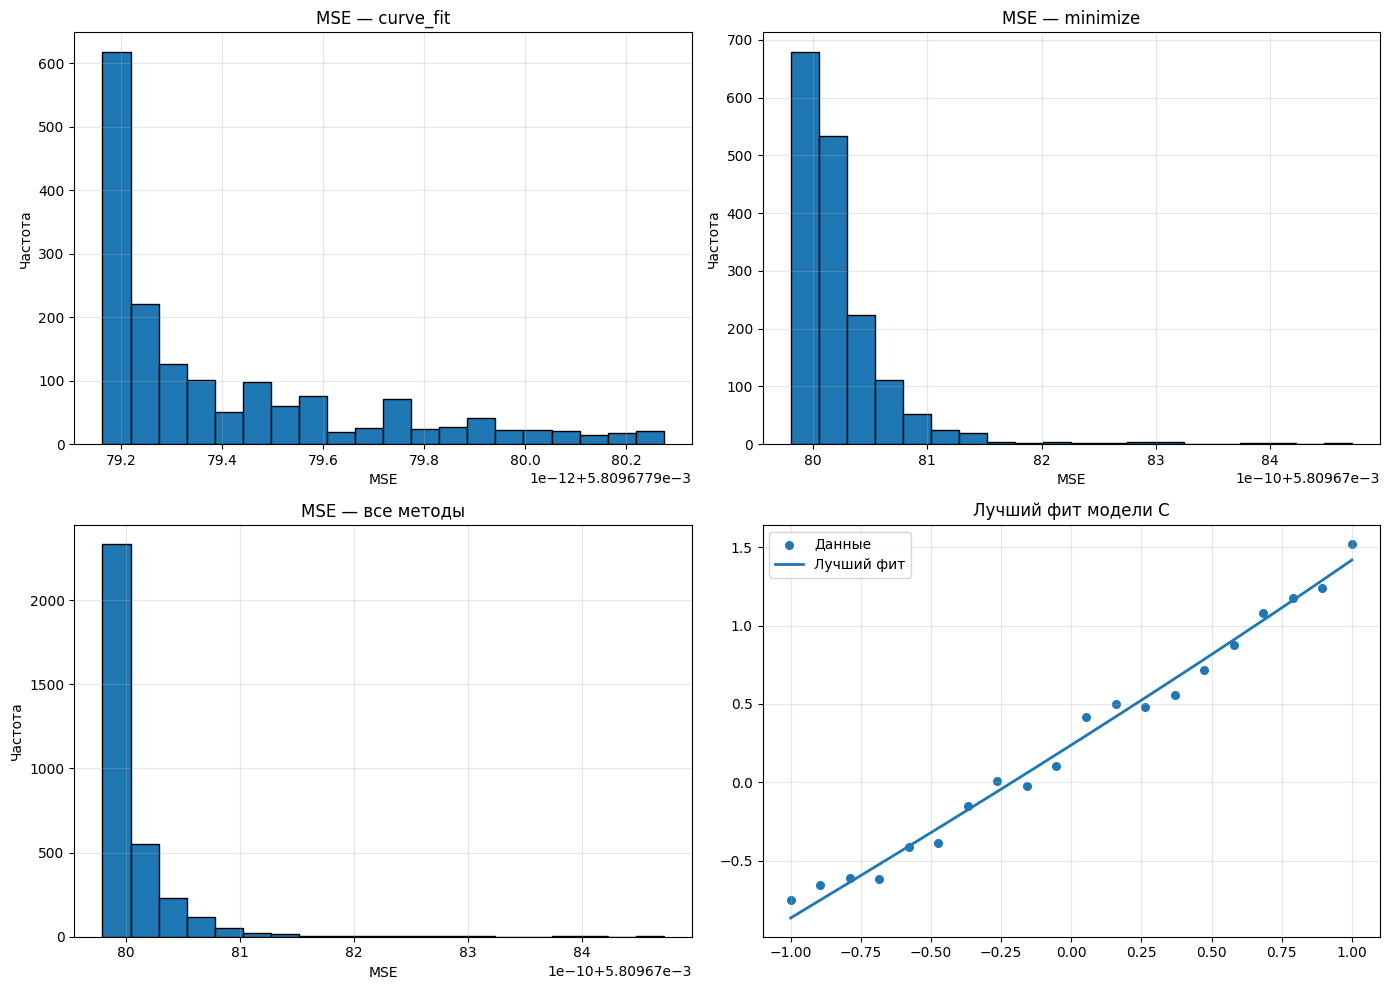

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# ----- ДАНО -----
x = np.array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

y = np.array([-0.74891715, -0.65095606, -0.60697928, -0.6121538 , -0.41373307,
       -0.38780335, -0.1484896 ,  0.01130637, -0.02568361,  0.10343917,
        0.4143106 ,  0.49889605,  0.4820576 ,  0.55667753,  0.71352544,
        0.87690755,  1.08166825,  1.17408942,  1.23978853,  1.52243887])

# ----- МОДЕЛЬ C -----
f = lambda x, u, v: u * np.exp(v*x) + x

# ----- ФУНКЦИЯ MSE -----
def mse(params):
    u, v = params
    return np.mean((y - f(x, u, v))**2)

# ----- СЕТКА НАЧАЛЬНЫХ ПРИБЛИЖЕНИЙ -----
initials = [(i, j) for i in range(-20, 21) for j in range(-20, 21)]

mses_cf = []      # MSE для curve_fit
params_cf = []    # параметры curve_fit

mses_min = []     # MSE для minimize
params_min = []   # параметры minimize

# ----- ОБХОД ВСЕХ НАЧАЛЬНЫХ ТОЧЕК -----
for p0 in initials:
    # ---- curve_fit ----
    try:
        popt, pcov = opt.curve_fit(f, x, y, p0, maxfev=5000)
        m = np.mean((y - f(x, *popt))**2)
        mses_cf.append(m)
        params_cf.append(popt)
    except:
        pass

    # ---- minimize ----
    try:
        res = opt.minimize(mse, p0, method='Nelder-Mead')
        if res.success:
            m = mse(res.x)
            mses_min.append(m)
            params_min.append(res.x)
    except:
        pass

# ----- ВЫБИРАЕМ ЛУЧШИЙ ФИТ -----
all_mses = mses_cf + mses_min
all_params = params_cf + params_min

best_i = np.argmin(all_mses)
best_params = all_params[best_i]

print("Лучшие параметры u, v =", best_params)
print("Лучший MSE =", all_mses[best_i])

# ----- ВИЗУАЛИЗАЦИИ -----
plt.figure(figsize=(14, 10))

# Гистограмма curve_fit
plt.subplot(2, 2, 1)
plt.hist(mses_cf, bins=20, edgecolor='black')
plt.title("MSE — curve_fit")
plt.xlabel("MSE")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)

# Гистограмма minimize
plt.subplot(2, 2, 2)
plt.hist(mses_min, bins=20, edgecolor='black')
plt.title("MSE — minimize")
plt.xlabel("MSE")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)

# Все MSE вместе
plt.subplot(2, 2, 3)
plt.hist(all_mses, bins=20, edgecolor='black')
plt.title("MSE — все методы")
plt.xlabel("MSE")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)

# Лучшая аппроксимация
plt.subplot(2, 2, 4)
xx = np.linspace(min(x), max(x), 300)
yy = f(xx, *best_params)

plt.scatter(x, y, label="Данные", s=30)
plt.plot(xx, yy, label="Лучший фит", linewidth=2)
plt.title("Лучший фит модели C")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


3) Решите численно систему:

   $$
   \begin{cases}
   x^2 + y^2 = 2 \\
   x = \sin(y)
   \end{cases}
   $$

Найдите хотя бы одно решение $(x,y)$ и подставьте его обратно в систему для проверки корректности. Укажите также количество итераций.

Оцените на практике порядок сходимости выбранного метода, построив $||e_k||$ от $k$, где $e_k = (x_k, y_k) - (x_*, y_*)$

Решение:
[0.89056548 1.09858687]

Проверка:
x^2 + y^2 = 2.0  (должно быть 2)
sin(y)    = 0.8905654823643953  (должно быть x)

Число итераций: 23
Оценка порядка сходимости ||x_n - x*|| ≈ 0.3625714284752609  ||x_n-1 - x*||^0.9971441762858697


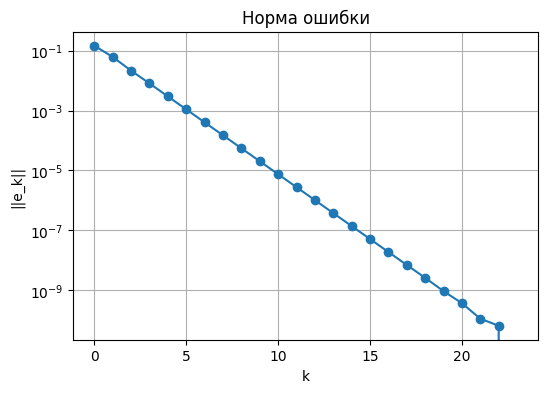

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x, y):
    x_new = np.sin(y)
    y_new = np.sqrt(2 - x_new**2)
    return np.array([x_new, y_new])

history = []

def iter_solve(phi, v0, eps, maxfev=500):
    v = np.array(v0, dtype=float)
    history.clear()
    history.append(v.copy())

    for k in range(maxfev):
        v_new = phi(*v)
        history.append(v_new.copy())
        if np.linalg.norm(v_new - v) < eps:
            return v_new
        v = v_new

    print("Не сошлось за maxfev итераций")
    return v


v_solve = iter_solve(phi, [1, 1], 1e-10, 500)

print("Решение:")
print(v_solve)


x, y = v_solve
print("\nПроверка:")
print("x^2 + y^2 =", x**2 + y**2, " (должно быть 2)")
print("sin(y)    =", np.sin(y),  " (должно быть x)")

print("\nЧисло итераций:", len(history)-1)

log_x = []
log_y = []

errors = [np.linalg.norm(v - v_solve) for v in history]
for k in range(len(errors)-1):
    if errors[k] > 0 and errors[k+1] > 0:
        log_x.append(np.log(errors[k]))
        log_y.append(np.log(errors[k+1]))

p, C = np.polyfit(log_x, log_y, 1)

print(f"Оценка порядка сходимости ||x_n - x*|| ≈ {np.exp(C)}  ||x_n-1 - x*||^{p}")

# ======== График ========
plt.figure(figsize=(6,4))
plt.semilogy(errors, marker='o')
plt.xlabel("k")
plt.ylabel("||e_k||")
plt.title("Норма ошибки")
plt.grid(True)
plt.show()



4) Рассмотрите матрицу:

   $$
   A(\alpha)=\begin{pmatrix}
   \alpha & 1 & 0 \\
   0 & -10 & 1 \\
   \alpha^3 & 0 & \alpha
   \end{pmatrix}.
   $$
   
Найдите собственные числа как функцию $\alpha$ при $\alpha \in [0,5]$ и постройте график их изменения. Постройте также число обусловленности матрицы от параметра $\alpha$.

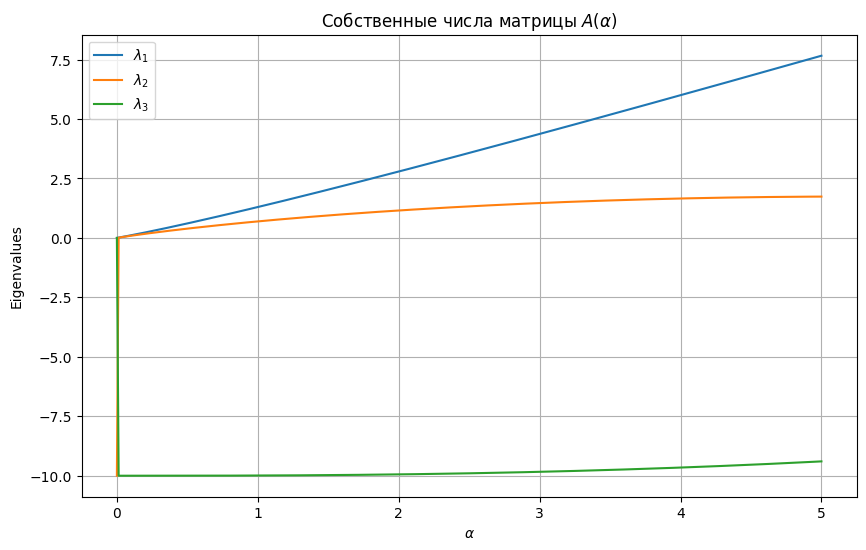

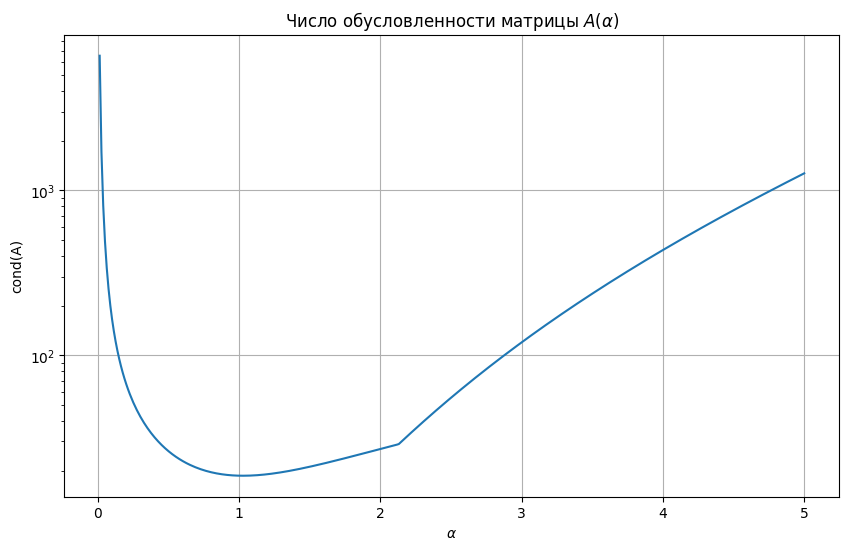

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем матрицу A(alpha)
def A(alpha):
    return np.array([
        [alpha, 1,     0],
        [0,    -10,    1],
        [alpha**3, 0,  alpha]
    ], dtype=float)

# Диапазон параметра
alphas = np.linspace(0, 5, 400)

eigvals = []
conds = []

# Вычисляем собственные значения и числа обусловленности
for a in alphas:
    M = A(a)
    vals = np.linalg.eigvals(M)
    eigvals.append(vals)
    conds.append(np.linalg.cond(M))

eigvals = np.array(eigvals)
conds = np.array(conds)

# ---------- ГРАФИК СОБСТВЕННЫХ ЧИСЕЛ ----------
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(alphas, eigvals[:, i], label=f"$\\lambda_{i+1}$")
plt.xlabel("$\\alpha$")
plt.ylabel("Eigenvalues")
plt.title("Собственные числа матрицы $A(\\alpha)$")
plt.grid(True)
plt.legend()
plt.show()

# ---------- ГРАФИК ЧИСЛА ОБУСЛОВЛЕННОСТИ ----------
plt.figure(figsize=(10, 6))
plt.plot(alphas, conds)
plt.xlabel("$\\alpha$")
plt.ylabel("cond(A)")
plt.title("Число обусловленности матрицы $A(\\alpha)$")
plt.grid(True)
plt.yscale('log')  # удобно, т.к. число обусловленности может расти сильно
plt.show()
